-------------

# <center> PARKINSON'S DISEASE PREDICTION SYSTEM  </center>

-----------

## <center> Importing the Dependencies </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os

import warnings
warnings.filterwarnings('ignore')

## <center> Data Collection and Analysis </center>

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# print last 5 rows of the dataset
parkinsons_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [6]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# getting the statistical measures of the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


- 1  --> Parkinson's Positive

- 0 --> Healthy

In [9]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [10]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [11]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [12]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


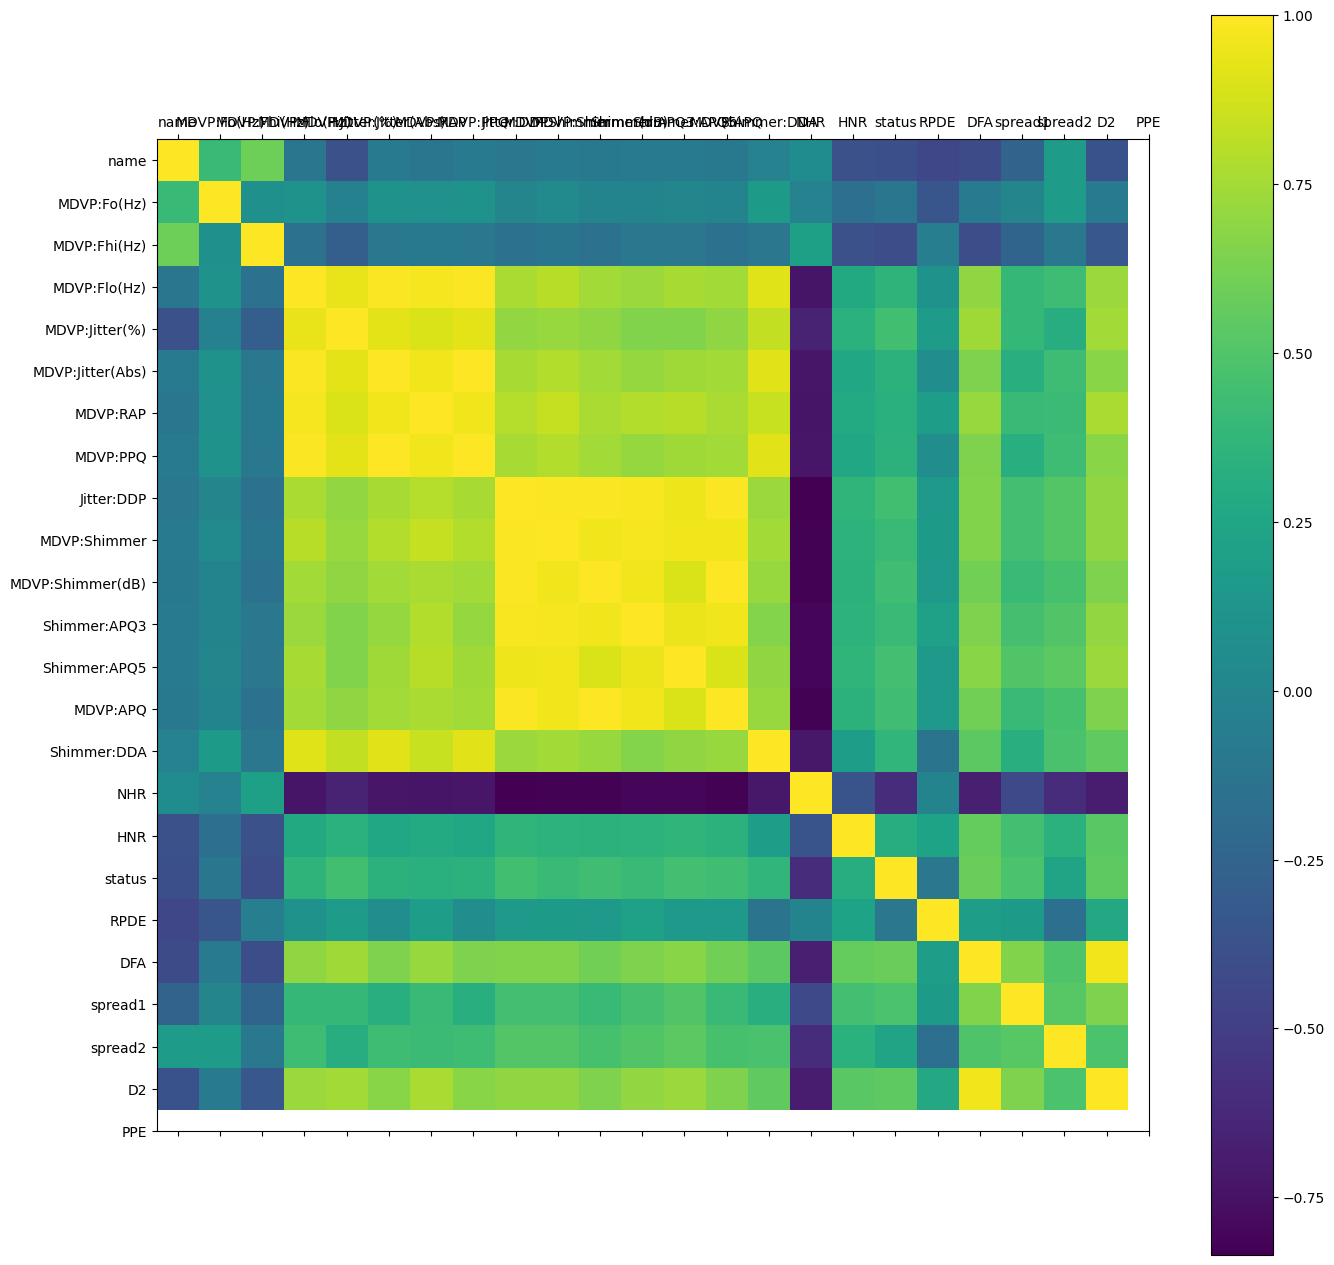

In [27]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 10,18
plt.matshow(parkinsons_data.corr())
plt.yticks(np.arange(parkinsons_data.shape[1]), parkinsons_data.columns)
plt.xticks(np.arange(parkinsons_data.shape[1]), parkinsons_data.columns)
plt.colorbar()

1    147
0     48
Name: status, dtype: int64


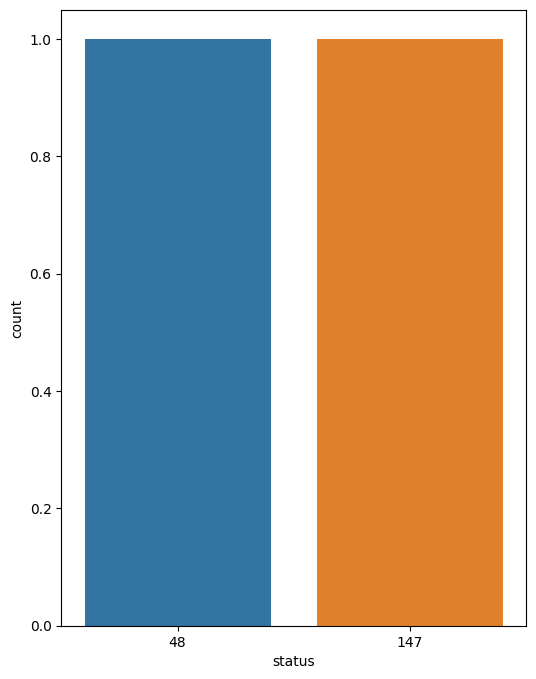

In [28]:
#data visualization for heart disease patients
y = parkinsons_data["status"]
status_temp = parkinsons_data['status'].value_counts()

rcParams['figure.figsize'] = 6,8
sns.countplot(x=status_temp)
print(status_temp)

- 1  --> Parkinson's Positive

- 0 --> Healthy

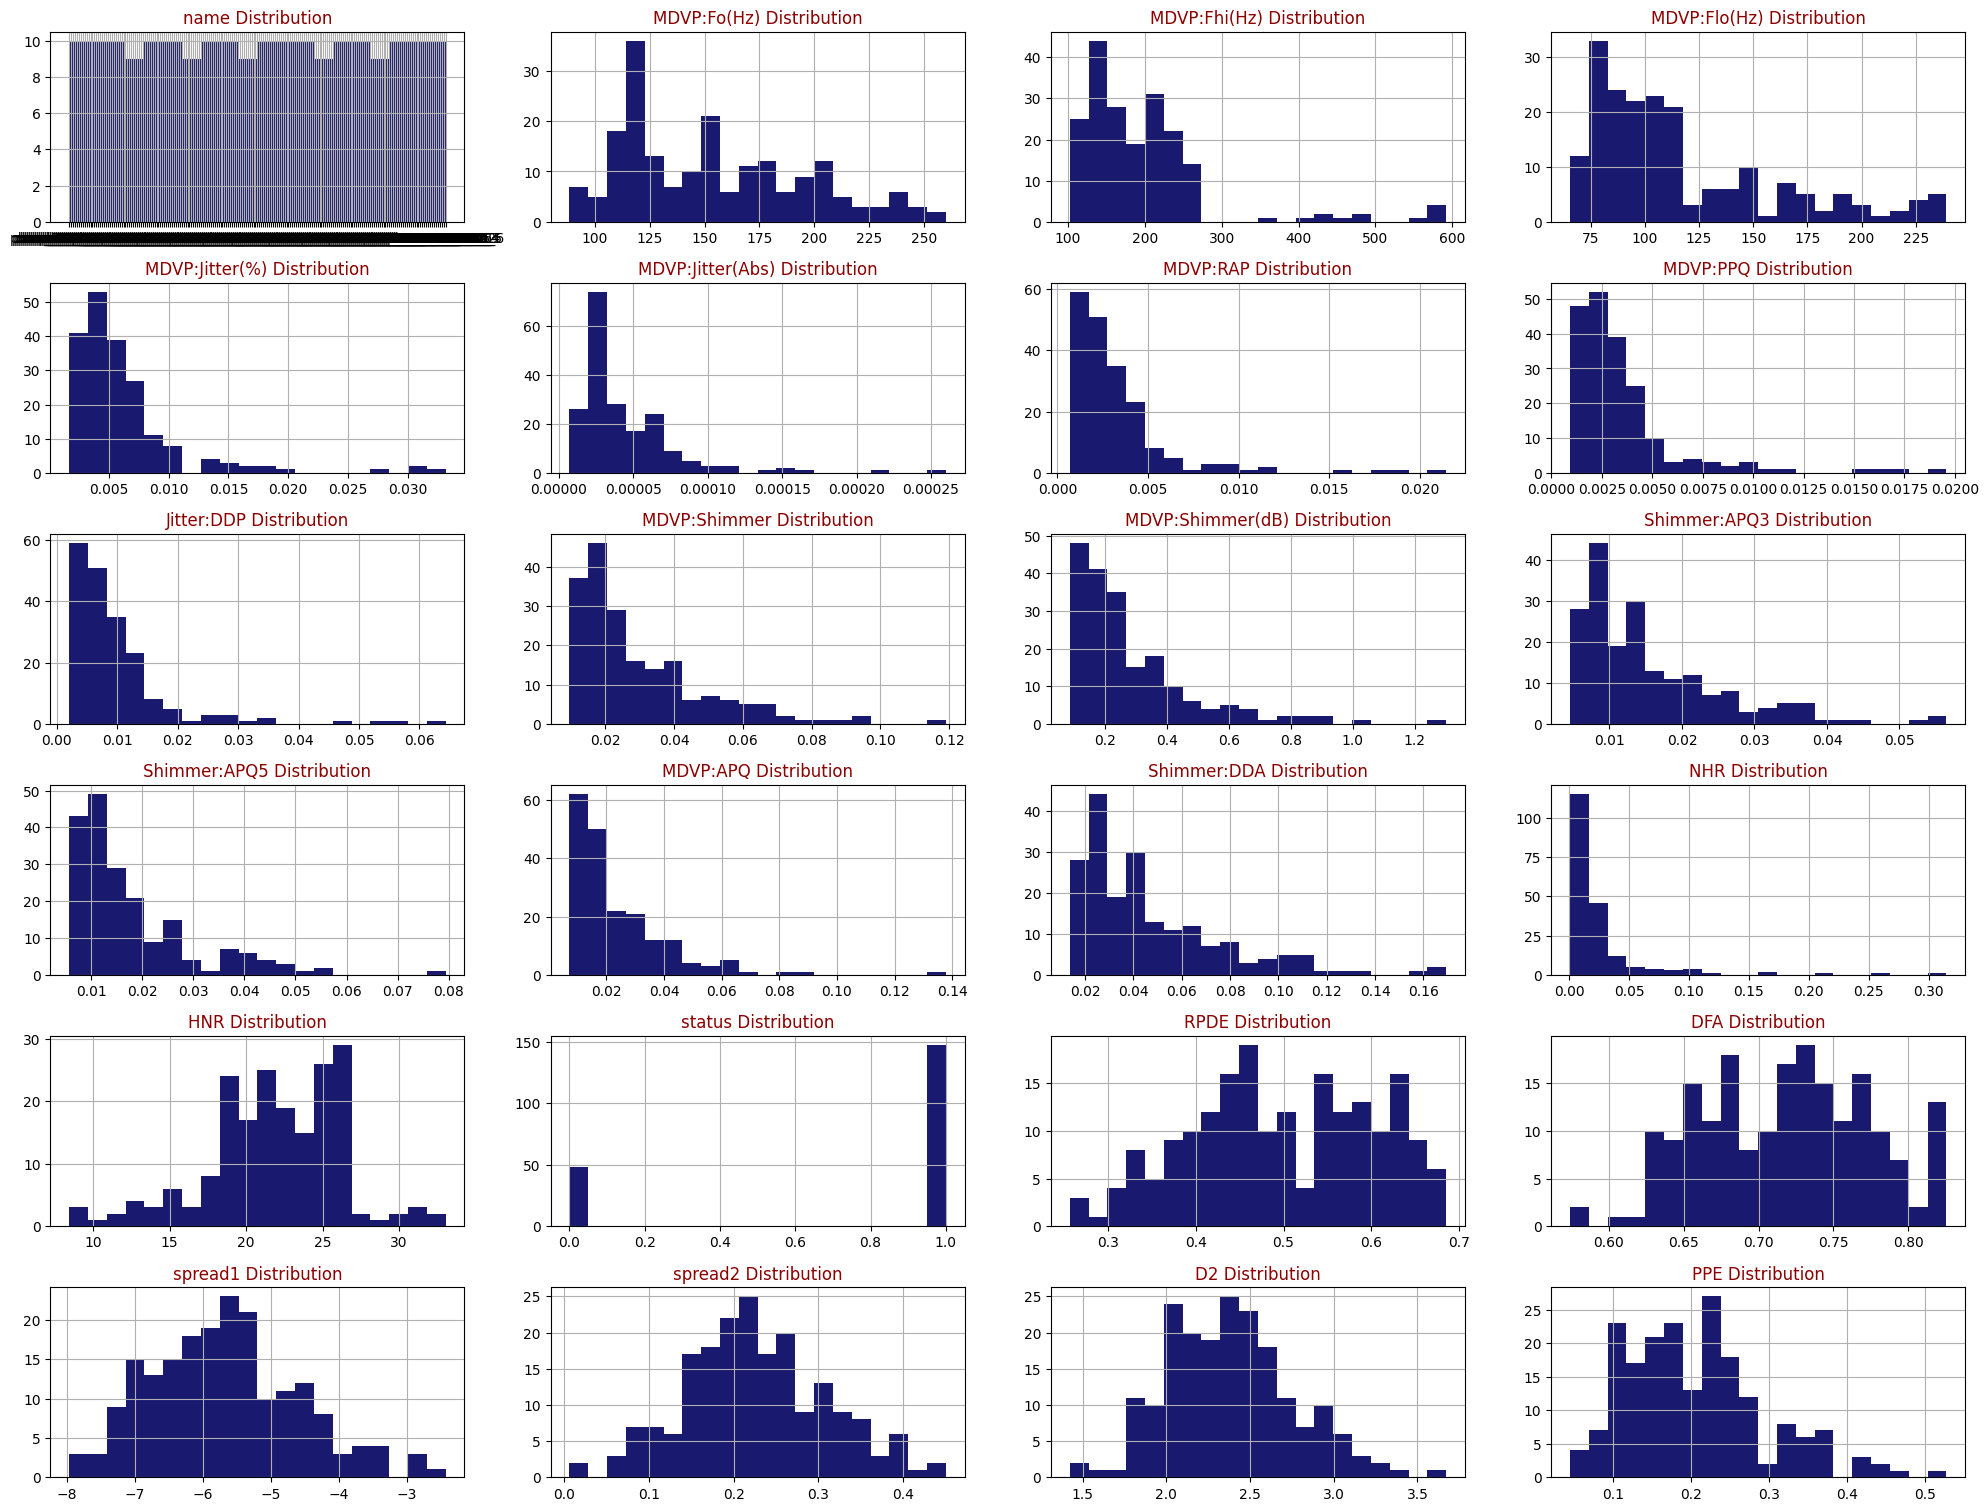

In [30]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(parkinsons_data,parkinsons_data.columns,8,4)

## <center> Splitting the Data into Training data & Test Data </center>

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


# <center> Model Training </center>

## 1] Support Vector Machine

In [33]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)

SVC(kernel='linear')

In [34]:
Y_pred_svm = sv.predict(X_test)

## 2] Logistic Regression

In [35]:
model = LogisticRegression()

In [36]:
# training the LogisticRegression model with Training data
model.fit(X_train,Y_train)

LogisticRegression()

## 3] K Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test.values)

## 4] Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

## 5] XGBoost

In [40]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

## <center> Model Evaluation </center>

### Accuracy Score and Classification Report

## 1] Support Vector Machine

In [41]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 84.62 %


In [42]:
# accuracy on train data
sv_train_prediction = sv.predict(X_train)
training_data_accuracy = accuracy_score(sv_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8653846153846154


In [43]:
# accuracy on test data
sv_test_prediction = sv.predict(X_test)
test_data_accuracy = accuracy_score(sv_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8461538461538461


In [44]:
# performance evaluation metrics
print(classification_report(sv_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.93      0.87      0.90        31

    accuracy                           0.85        39
   macro avg       0.77      0.81      0.78        39
weighted avg       0.86      0.85      0.85        39



## 2] Logistic Regression

In [45]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8717948717948718


In [46]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8461538461538461


In [47]:
score_lr = round(accuracy_score(X_test_prediction, Y_test)*100,2)
print("The accuracy score achieved using Linear Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Linear Regression is: 84.62 %


In [48]:
# performance evaluation metrics
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.93      0.87      0.90        31

    accuracy                           0.85        39
   macro avg       0.77      0.81      0.78        39
weighted avg       0.86      0.85      0.85        39



## 3] K Nearest Neighbors

In [49]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 89.74 %


In [50]:
# accuracy on train data
knn_train_prediction = sv.predict(X_train)
training_data_accuracy = accuracy_score(knn_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8653846153846154


In [52]:
# accuracy on test data
knn_test_prediction = knn.predict(X_test.values)
test_data_accuracy = accuracy_score(knn_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8974358974358975


In [53]:
# performance evaluation metrics
print(classification_report(knn_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.88      0.94        33

    accuracy                           0.90        39
   macro avg       0.80      0.94      0.84        39
weighted avg       0.94      0.90      0.91        39



## 4] Random Forest

In [54]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 97.44 %


In [55]:
# accuracy on train data
rf_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(rf_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [56]:
# accuracy on test data
rf_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9743589743589743


In [57]:
# performance evaluation metrics
print(classification_report(rf_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.98        30

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



## 5] XGBoost

In [58]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 94.87 %


In [59]:
# accuracy on train data
xgb_train_prediction = xgb_model.predict(X_train)
training_data_accuracy = accuracy_score(xgb_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [60]:
# accuracy on test data
xgb_test_prediction = xgb_model.predict(X_test)
test_data_accuracy = accuracy_score(xgb_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9487179487179487


In [61]:
# performance evaluation metrics
print(classification_report(rf_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.98        30

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



In [62]:
scores = [score_svm,score_lr,score_knn,score_rf,score_xgb]
algorithms = ["Support Vector Machine","Linear Regression","K-Nearest Neighbors","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 84.62 %
The accuracy score achieved using Linear Regression is: 84.62 %
The accuracy score achieved using K-Nearest Neighbors is: 89.74 %
The accuracy score achieved using Random Forest is: 97.44 %
The accuracy score achieved using XGBoost is: 94.87 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

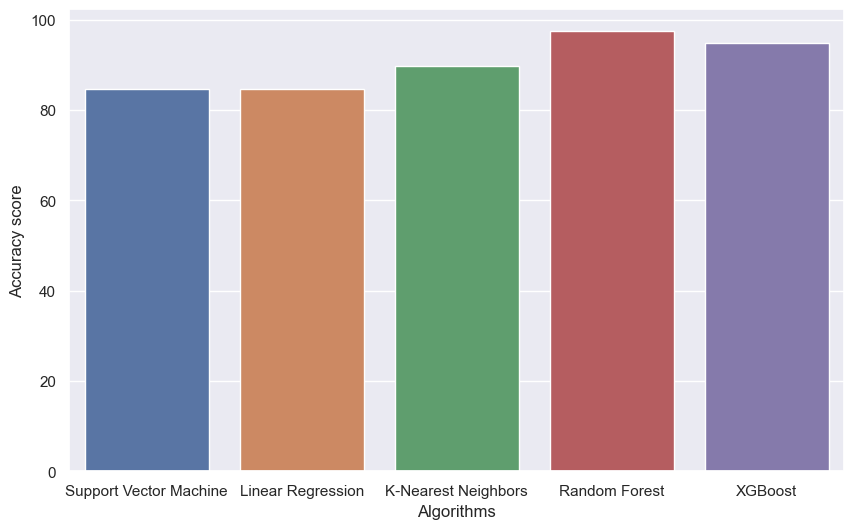

In [63]:
#data visualisation
sns.set(rc={'figure.figsize':(10,6)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

## <center> Building a Predictive System </center>

In [64]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = sv.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


## <center> Saving the trained model </center>

In [65]:
import pickle

In [66]:
filename = 'diabetes_model.sav'
pickle.dump(sv, open(filename, 'wb'))

In [67]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [68]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
